<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Load the csv file

In [2]:
# type your code here
df_h=pd.read_csv('Heart_disease.csv')
df_h.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


In [3]:
df_h.shape

(4240, 16)

In [4]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
#type casting../male/education/currentsmoker/BPMeds/
df_h['male']=df_h['male'].astype(object)
df_h['education']=df_h['education'].astype(object)
df_h['currentSmoker']=df_h['currentSmoker'].astype(object)
df_h['BPMeds']=df_h['BPMeds'].astype(object)
df_h['prevalentStroke']=df_h['prevalentStroke'].astype(object)
df_h['prevalentHyp']=df_h['prevalentHyp'].astype(object)
df_h['diabetes']=df_h['diabetes'].astype(object)

In [6]:
(df_h.isnull().sum()/df_h.shape[0])*100

male              0.000000
age               0.000000
education         2.476415
currentSmoker     0.000000
cigsPerDay        0.683962
BPMeds            1.250000
prevalentStroke   0.000000
prevalentHyp      0.000000
diabetes          0.000000
totChol           1.179245
sysBP             0.000000
diaBP             0.000000
BMI               0.448113
heartRate         0.023585
glucose           9.150943
CVD               0.000000
dtype: float64

In [7]:
df_h=df_h.dropna(axis=0,subset=['education','cigsPerDay','BPMeds','totChol','BMI','heartRate'])

In [8]:
df_h.glucose.skew()

6.2819106259853585

In [9]:
df_h['glucose']=df_h['glucose'].fillna(df_h.glucose.median())

In [10]:
df_h.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [11]:
df_h_num=df_h.select_dtypes(np.number).drop('CVD',axis=1)
df_h_cat=df_h.select_dtypes(include='object')

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the proportion of classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
print('class 0 :',(df_h.CVD.value_counts()[0])*100/len(df_h.CVD))
print('class 1 :',(df_h.CVD.value_counts()[1])*100/len(df_h.CVD))

class 0 : 85.08398094760592
class 1 : 14.916019052394084


<AxesSubplot:xlabel='CVD', ylabel='count'>

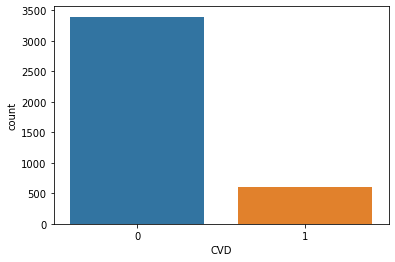

In [13]:
sns.countplot(x=df_h.CVD)

In [14]:
#for class_0 there are 85% records and for class_1 14% records there are some kind of imbalance between 2 classes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
ss=StandardScaler()
df_h_num=pd.DataFrame(ss.fit_transform(df_h_num),columns=df_h_num.columns)
col_num=df_h_num.columns
df_h_cat=pd.get_dummies(df_h_cat,drop_first=True)
col_cat=df_h_cat.columns

In [16]:
df_h_num.reset_index(drop=True,inplace=True)
df_h_cat.reset_index(drop=True,inplace=True)

In [17]:
df_h_num.columns=col_num
df_h_cat.columns=col_cat

In [18]:
df_tot=pd.concat([df_h_num,df_h_cat],axis=1)

In [19]:
df_tot.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'male_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1'],
      dtype='object')

In [20]:
X=df_tot[['sysBP','diaBP','BPMeds_1.0']]

y=df_h.CVD.reset_index(drop=True)

In [21]:
X=sm.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [22]:
logit_1=sm.Logit(y_train,x_train).fit()
logit_1.summary()

Optimization terminated successfully.
         Current function value: 0.392410
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3187
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                 0.05239
Time:                        14:24:54   Log-Likelihood:                -1252.2
converged:                       True   LL-Null:                       -1321.4
Covariance Type:            nonrobust   LLR p-value:                 8.096e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8792      0.055    -34.344      0.000      -1.986      -1.772
sysBP          0.6171      0.074      8.283      0.000       0.471       0.763
diaBP         -0.1112      0.076     -1.465      0.143      -0.260       0.038
BPMeds_1.0     0.1689      0.245      0.690      0.490      -0.311       0.649
==============================================================================
"""

In [23]:
#sysBP has more impact . 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
X=df_h_cat
X=sm.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

logit_2=sm.Logit(y_train,x_train).fit()
print(logit_2.summary())

Optimization terminated successfully.
         Current function value: 0.387490
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3181
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                 0.06428
Time:                        14:24:57   Log-Likelihood:                -1236.5
converged:                       True   LL-Null:                       -1321.4
Covariance Type:            nonrobust   LLR p-value:                 6.569e-32
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3206      0.117    -19.801      0.000      -2.550      -2.091
male_1  

In [25]:
np.exp(logit_2.params)

const               0.098216
male_1              1.576969
education_2.0       0.634988
education_3.0       0.772953
education_4.0       0.846585
currentSmoker_1     1.143541
BPMeds_1.0          1.420087
prevalentStroke_1   3.327786
prevalentHyp_1      2.663410
diabetes_1          3.016980
dtype: float64

In [26]:
#prevalentStroke_1 is more significantwith the target variable.

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here

X=df_tot
X=sm.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

logit_3=sm.Logit(y_train,x_train).fit()
print(logit_3.summary())

Optimization terminated successfully.
         Current function value: 0.362807
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 3191
Model:                          Logit   Df Residuals:                     3173
Method:                           MLE   Df Model:                           17
Date:                Fri, 20 Aug 2021   Pseudo R-squ.:                  0.1239
Time:                        14:25:02   Log-Likelihood:                -1157.7
converged:                       True   LL-Null:                       -1321.4
Covariance Type:            nonrobust   LLR p-value:                 2.429e-59
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3432      0.148    -15.885      0.000      -2.632      -2.054
age     

the R2 value is .1239

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
logit_3.pvalues[logit_3.pvalues < 0.05].sort_values() #these are the most significant variable

const               0.000000
age                 0.000000
glucose             0.000101
male_1              0.000109
sysBP               0.004337
cigsPerDay          0.008101
prevalentStroke_1   0.023157
totChol             0.027172
prevalentHyp_1      0.029572
dtype: float64

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>6. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here
y_pred_prob=logit_3.predict(x_test)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [30]:
cn_mt=confusion_matrix(y_test,y_pred)
cn_mt

array([[661,   5],
       [123,   9]], dtype=int64)

In [31]:
TN=cn_mt[0,0]
TP=cn_mt[1,1]
FN=cn_mt[1,0]
FP=cn_mt[0,1]

In [32]:
accuracy_score=(TN+TP)/(TN+TP+FN+FP)
print('The accuracy score is :',accuracy_score)

The accuracy score is : 0.8395989974937343


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
y_pred=[0 if x<0.18 else 1 for x in y_pred_prob]
print('the kappa value : ',cohen_kappa_score(y_test,y_pred))

the kappa value :  0.23923873790758365


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

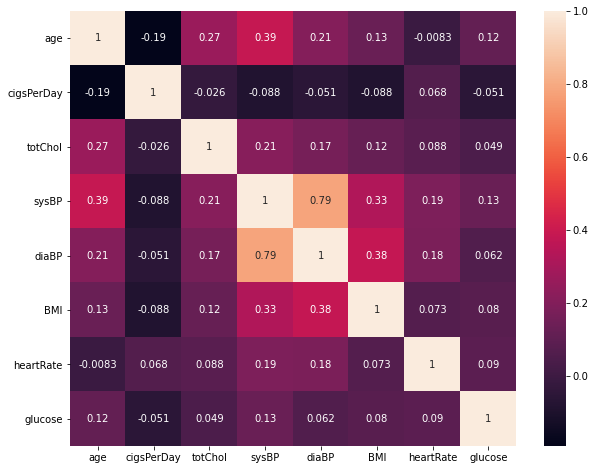

In [34]:
# type your code here
plt.figure(figsize=(10,8))
sns.heatmap(df_h_num.corr(),annot=True)

In [35]:
df_h_new=df_tot.drop('diaBP',axis=1)

In [36]:
X=df_h_new
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the data obtained from Q8 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
# type your code here
from sklearn.feature_selection import RFE

log_reg=LogisticRegression()
rfe=RFE(estimator=log_reg,n_features_to_select=5)
rfe=rfe.fit(x_train,y_train)

In [38]:
ft=pd.Series(data=rfe.ranking_,index=x_train.columns)
ft[ft==1].index

Index(['age', 'sysBP', 'male_1', 'prevalentStroke_1', 'prevalentHyp_1'], dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a model using the features obtained in question 9. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                         <li>Roc_Auc</li>
                         <li> Precision </li>
                        <li> Recall</li>  
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
# type your code here
X1=df_h_new[['age','sysBP','male_1','prevalentStroke_1','prevalentHyp_1']]
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.2,random_state=10)

In [49]:
log_reg1=LogisticRegression()
log_reg1=log_reg1.fit(x_train1,y_train1)

In [56]:
y_pred_rfe=log_reg1.predict(x_test1)

accuracy_score(y_test1,y_pred_rfe)

In [46]:
print(classification_report(y_test1,y_pred_rfe))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       666
           1       0.50      0.03      0.06       132

    accuracy                           0.83       798
   macro avg       0.67      0.51      0.48       798
weighted avg       0.78      0.83      0.77       798



In [ ]:
# the f1 score 77%
#Precision value is 78%
#Recall value 83%

In [61]:
prob=log_reg1.predict_proba(x_test1)
fpr,tpr,th=roc_curve(y_test1,prob[:,1])

Text(0, 0.5, 'tpr')

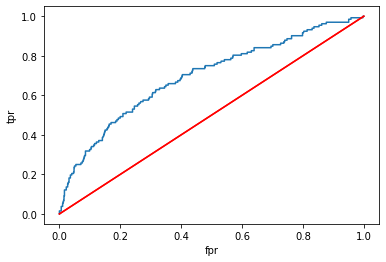

In [63]:
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [64]:
roc_auc_score(y_test1,prob[:,1])

0.6947288197288196

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Calculate the cross entropy for the model built in question 8.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
from sklearn.metrics import log_loss

In [59]:
log_loss(y_test1,y_pred_rfe)

5.713185065811944

<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
# type your code here
X=df_h_new
y=df_h.CVD.reset_index(drop=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)

In [69]:
ypred_2=lr.predict_proba(x_test)

In [73]:
fpr,tpr,th=roc_curve(y_test,ypred_2[:,1])
youden= pd.DataFrame({'TPR': tpr,
                      'FPR': fpr,
                      'thres':th})
youden['YI']= youden.TPR- youden.FPR
youden= youden.sort_values('YI',ascending=False).reset_index(drop=True)
youden.head()

,TPR,FPR,thres,YI
0,0.621212,0.282282,0.162574,0.338930
1,0.583333,0.246246,0.176987,0.337087
2,0.651515,0.315315,0.152287,0.336200
3,0.606061,0.270270,0.167516,0.335790
4,0.613636,0.279279,0.164759,0.334357


In [ ]:
#best thesshold we have got is 0.1625

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# type your code here
ypred=lr.predict_proba(x_test)

In [75]:
fn=3
fp=1.3
th=np.arange(0.1,1,0.1)

total_cost=[]

for t in th:
    pred= [0 if p<t else 1 for p in ypred[:,1]]
    cm= confusion_matrix(y_test,pred)
    fp= cm[0,1]
    fn= cm[1,0]
    cost= fp*1.3+fn*3
    total_cost.append(cost)

    
df= pd.DataFrame({'threshold':th,'tot cost':total_cost})
df[df['tot cost']==df['tot cost'].min()]

,threshold,tot cost
3,0.400000,361.500000


In [ ]:
#minimum thresold is 0.4